# Bharat Intern Task 2

### Iris Flowers Classification

In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [97]:
# Load the Iris dataset
iris = pd.read_csv(r"C:\Users\ayush\Downloads\Iris.csv")

In [98]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
iris1 = iris.copy()

In [100]:
labelencoder = LabelEncoder()
iris1.iloc[:, -1] = labelencoder.fit_transform(iris1.iloc[:,-1])

In [101]:
iris1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [102]:
iris1['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [103]:
iris1 = iris1.drop('Id', axis=1)

In [104]:
# Dividing our data into input and output variables 
X = iris1.iloc[:,0:4]
y = iris1.iloc[:,4:5]

In [105]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Create a Support Vector Machine (SVM) classifier
svm = SVC(C=1.0, kernel='linear', random_state=42)

In [109]:
# Fit the classifier to the training data
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [110]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [112]:
# Evaluate the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [113]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



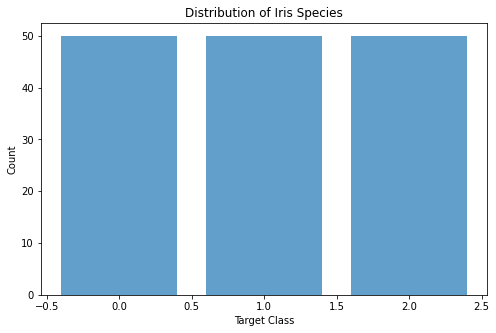

In [114]:
# Visualize the distribution of target labels
plt.figure(figsize=(8, 5))
plt.hist(y, bins=[0, 1, 2, 3], align='left', rwidth=0.8, alpha=0.7)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of Iris Species')
plt.show()